# ISEL - CPS 
## Semestre 2022/23
# <br>
###  <center> Trabalho Prático 1 </center>
# </br>


Trabalho realizado por:
* Alexandre Ferreira, numero <b> 47485 </b>
* João Maria Gonçalves, numero <b> 47507 </b>
* Henrique Matos, numero <b> 48608 </b>

<b> Turma L33 - Docente </b>
 


A figura representa o esquema típico do processo de envio e recepção de informação usando modulações
digitais.

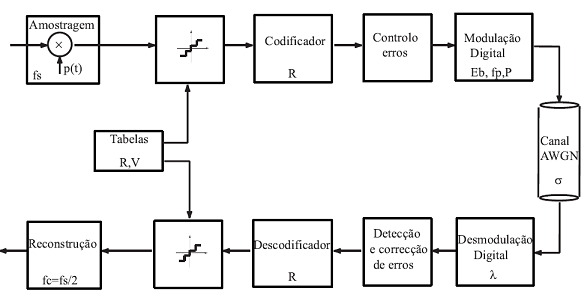

O 1º trabalho foca os blocos Quantificação/ Desquantificação do sinal e Códigos Detectores e Correctores de Erros. 

Além disso inclui uma revisão teórica da Amostragem e Reconstrução.




# A. Amostragem

1. Considere o sinal $x(t) = 20000 cos(2\pi 5025 t) + 10000 sin(2\pi 2507 t)$. Estude o sinal teoricamente. Apresente a expressão do espetro do sinal e represente numa figura o espectro de Amplitude e de Fase do sinal.


<Figure size 432x288 with 0 Axes>

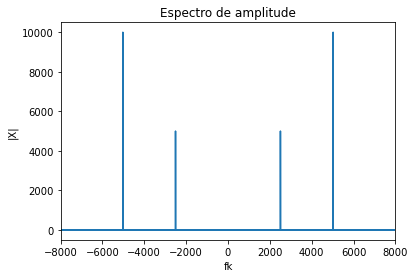

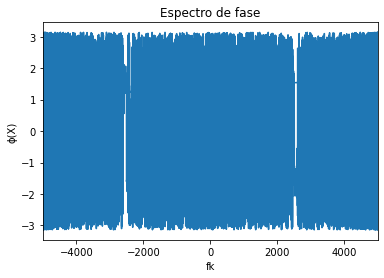

<Figure size 432x288 with 0 Axes>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
 
Fs = 48000 # frequencia de Amostragem
Ts = 1/Fs # periodo de amostragem
t = np.arange(0, 1, Ts)

x = 20000*np.cos(2*np.pi*5025*t) + 10000*np.sin(2*np.pi*2507*t)


# Utiliza-se a FFT para realizar a DFT da onda, obtendo-se um array de complexos
# que contém a amplitude na parte real e a fase na parte imaginária.
A = np.fft.fft(x)
# A ffrfreq tem como output uma lista de frequências desde -Fs/2 até Fs/2 para servir como eixo de x nos espetros
fk = np.fft.fftfreq(len(x),1/Fs)


# Espetro de amplitude em função da frequência
plt.figure()
plt.xlim(-8000,8000)
plt.title('Espectro de amplitude')
plt.plot(fk, np.abs(A)/len(A));
plt.xlabel('fk')
plt.ylabel('|X|')


# Espetro de fase em função da frequência
plt.figure()
plt.xlim(-5000 ,5000)
angle = np.angle(A)
plt.title('Espectro de fase')
plt.plot(fk, angle);
plt.xlabel('fk')
plt.ylabel('ϕ(X)')
plt.figure()

#teste

2. Gere o sinal $x(t)$ usando o Python. Cnsidere o intervalo de tempo $0 < t < 1\,ms$, e a frequência de amostragem de 48KHz. Apresente numa figura o sinal no domínio do tempo e noutra figura o seu espetro de amplitude.


<Figure size 432x288 with 0 Axes>

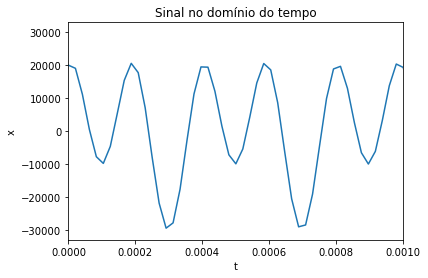

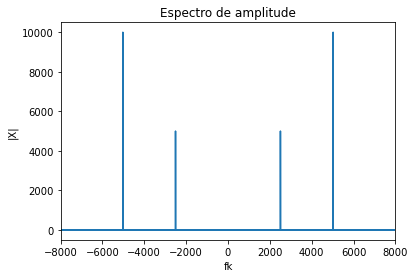

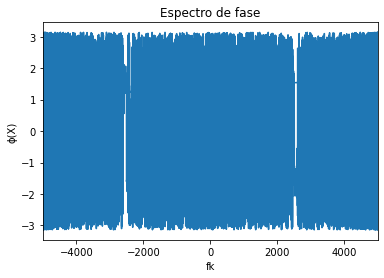

<Figure size 432x288 with 0 Axes>

In [2]:
Fs = 48000 # frequencia de Amostragem
Ts = 1/Fs # periodo de amostragem
t = np.arange(0, 1, Ts)

x = 20000*np.cos(2*np.pi*5025*t) + 10000*np.sin(2*np.pi*2507*t)
plt.title('Sinal no domínio do tempo')
plt.xlim(0,0.001)
plt.plot(t,x)
plt.xlabel('t')
plt.ylabel('x')


# Utiliza-se a FFT para realizar a DFT da onda, obtendo-se um array de complexos
# que contém a amplitude na parte real e a fase na parte imaginária.
A = np.fft.fft(x)
# A ffrfreq tem como output uma lista de frequências desde -Fs/2 até Fs/2 para servir como eixo de x nos espetros
fk = np.fft.fftfreq(len(x),1/Fs)


# Espetro de amplitude em função da frequência
plt.figure()
plt.xlim(-8000,8000)
plt.title('Espectro de amplitude')
plt.plot(fk, np.abs(A)/len(A));
plt.xlabel('fk')
plt.ylabel('|X|')


# Espetro de fase em função da frequência
plt.figure()
plt.xlim(-5000 ,5000)
angle = np.angle(A)
plt.title('Espectro de fase')
plt.plot(fk, angle);
plt.xlabel('fk')
plt.ylabel('ϕ(X)')
plt.figure()

3. Admitindo que faz a amostragem do sinal com uma frequência $f_s = 8kHz$, represente o espectro do sinal amostrado. Comente os resultados apresentados.

<Figure size 432x288 with 0 Axes>

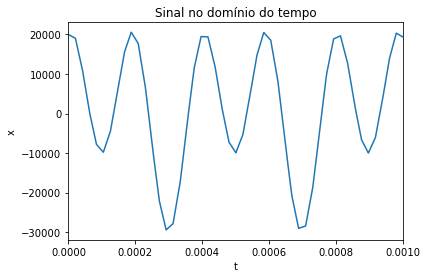

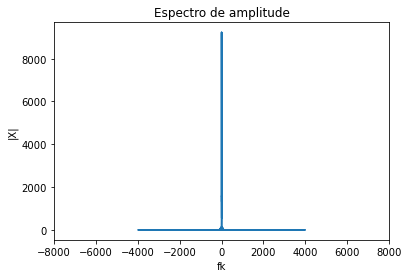

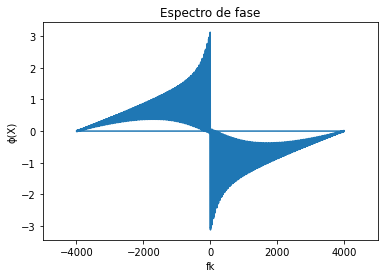

<Figure size 432x288 with 0 Axes>

In [3]:
Hz = 48000 # frequencia de Amostragem
T = 1/Hz # periodo de amostragem
t = np.arange(0, 1, Ts)

Fs = 8000 # Frequência de amostragem
Ts = 1/Fs # período de amostragem
x = 20000*np.cos(2*np.pi*5025*t) + 10000*np.sin(2*np.pi*2507*t)

# Base de tempo para a amostragem
r = Fs / Hz
num_amostras= round(len(x) * r)
n = np.linspace(0.0, 0.001, num_amostras, endpoint=False)

# Realiza-se a amostragem recorrendo à interpolação linear, em que para se obter amostras em pontos que 
# estão entre 2 amostras no sinal original, é necessário determinar o ponto entre essas amostras,
# e para isso recorre-se ao 'np.interp'
x = np.interp(n, t, x)

# Sinal no domínio do tempo
plt.title('Sinal no domínio do tempo')
plt.xlim(0,0.001)
plt.plot(n,x)
plt.xlabel('t')
plt.ylabel('x')


# Utiliza-se a FFT para realizar a DFT da onda, obtendo-se um array de complexos
# que contém a amplitude na parte real e a fase na parte imaginária.
A = np.fft.fft(x)
# A ffrfreq tem como output uma lista de frequências desde -Fs/2 até Fs/2 para servir como eixo de x nos espetros
fk = np.fft.fftfreq(len(x),1/Fs)


# Espetro de amplitude em função da frequência
plt.figure()
plt.xlim(-8000,8000)
plt.title('Espectro de amplitude')
plt.plot(fk, np.abs(A)/len(A));
plt.xlabel('fk')
plt.ylabel('|X|')


# Espetro de fase em função da frequência
plt.figure()
plt.xlim(-5000 ,5000)
angle = np.angle(A)
plt.title('Espectro de fase')
plt.plot(fk, angle);
plt.xlabel('fk')
plt.ylabel('ϕ(X)')
plt.figure()



# B. Quantificação

4. Construa uma função em Python que crie as tabelas com os valores de decisão e valores de quantificação para um quantificador uniforme. 

    Esta função tem como parâmetros de entrada o número de bits por amostra (R), o valor máximo a quantificar (Vmax) e o tipo de quantificador (midrse ou midtread). Como parâmetros de saída deve devolver dois Numpy arrays com valores de quantificação e os valores de decisão.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def Quantific(R,Vmax,Qtype):
    L = 2**R
    delta = (2*Vmax)/L
    if Qtype == 'midrise':
        Vq = np.arange(-Vmax + delta/2, Vmax, delta)
    elif Qtype == 'midtread':
        Vq = np.arange(-Vmax, Vmax, delta)
    Dq = Vq + delta/2
    return Vq, Dq

## Verifique se a sua implementação
Realize um conjunto de testes unitários. Admita que $R=3$ e $Vmax=1$, para uma quantificação midtread.
* use uma lista de valores (poucos para conseguir validar manualmente)
* use uma arange entre -Vmax e Vmax

In [5]:
Vq, Dq = Quantific(3,1,'midtread')
print('midtread')
print(Vq)
print(Dq)
Vq, Dq = Quantific(3,1,'midrise')
print('midrise')
print(Vq)
print(Dq)

midtread
[-1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75]
[-0.875 -0.625 -0.375 -0.125  0.125  0.375  0.625  0.875]
midrise
[-0.875 -0.625 -0.375 -0.125  0.125  0.375  0.625  0.875]
[-0.75 -0.5  -0.25  0.    0.25  0.5   0.75  1.  ]


## Implemente o quantificador

Implemente uma função que realize a quantificação


In [6]:
# Função que implementa o Quantificador
# in: 
# x - sinal com amostras (nao quantificadas)
# Vq, Dq - valores de quantificação e valores de decisão
# out: 
# xq - sinal quantificado
# iq - indices do sinal quantificado
# prototipo da função
# xq, iq = Quantificador(x, Vq, Dq)
def Quantificador(x, Vq, Dq):
    y = np.copy(x)
    
    # valores maior que o último valor de intervalo de quantificação
    y[y >= Dq[-1]] = Vq[-1]
    
    # substitui cada amostra pelo índide correspondente do valor de quantificação correspondente
    # o valor é escolhido determinando o menor valor de intervalo que seja maior do que a amostra
    for i in range(len(x)):
        y[i] = Vq[np.where(y[i] < Dq)[0][0]]
    return y

In [7]:
# testes unitarios
Vq = np.array([-0.75, -0.25, 0.25, 0.75])
Iq = np.array([-0.5, 0, 0.5, 1])
x = np.array([0.1, 0.6, -0.8, 3])
xq = Quantificador(x, Vq, Iq)
print(xq)

[ 0.25  0.75 -0.75  0.75]


## Use uma função sinusoidal e represente o sinal original, quantificado e o sinal de erro

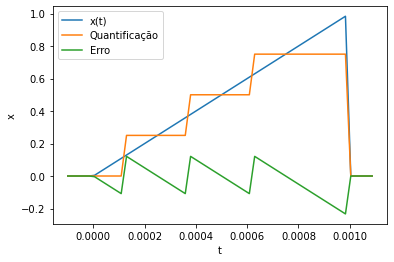

In [8]:
#Resposta:
Fs = 48000
t = np.arange(-0.0001, 0.0011, 1/Fs)
x = 1000*t
x[t < 0] = 0
x[t > 0.001] = 0
plt.plot(t,x, label='x(t)')
plt.xlabel('t')
plt.ylabel('x')
Vq, Iq = Quantific(3,1,'midtread')
xq = Quantificador(x, Vq, Iq)
plt.plot(t,xq, label='Quantificação')
xerr = xq - x
plt.plot(t,xerr, label='Erro')
plt.legend();

Represente o histograma do sinal de erro. Comente os resultados.

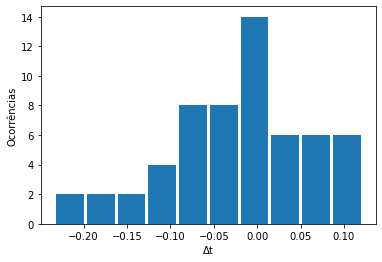

In [9]:
plt.hist(xerr, rwidth=0.9);
plt.xlabel('Δt')
plt.ylabel('Ocorrências');

Resposta

Existe uma grande ocorrência de valores perto de 0 devido aos valores nulos < 0 e > 10e-3.

Existem mais ocorrências com valores negativos do que positivos devido ao desiquilíbrio de níveis de quantificação do midtread devido à existência do nível de quantificação de valor 0. 

Existe também uma quantidade de valores com um erro negativo maior do que o resto, devido à não existência de um nível de quantificação mais próximo, pois foi necessário remover um nível no lado positivo para permitir o nível de valor 0.

## SNR

Crie uma função que meça o SNR prático, ou seja, medindo a potência do sinal e a potência do sinal de erro.


In [10]:
def Measure_SNRp(x,xq):
    Px = np.sum(x**2)/len(x)
    ruido = x - xq
    Pruido = np.sum(ruido**2)/len(ruido)
    SNR = Px / Pruido
    SNRp = 10 * np.log10(SNR)
    return SNRp

Crie uma função que calcule o SNR para o caso da quantificação uniforme.

$SNRt_{dB}= 6,02 \times N_b + 10 \log_{10} \frac{3 P_x}{V_{max}}$

In [11]:
def Measure_SNRt(R,Vmax,P):
    SNRtdb = 6.02 * R + 10 * np.log10((3*P)/(Vmax**2))
    return SNRtdb

## Testes
Considere o sinal de rampa já implementado.
Realize a quantificação do sinal x(t) para cada valor de R={3,4,5,6,7,8}.
Meça a SNR prática e o valor teórico. 
Construa um gráfico com ambos os valores da SNR teórica e medida em função do número de bits R. Comente os resultados.

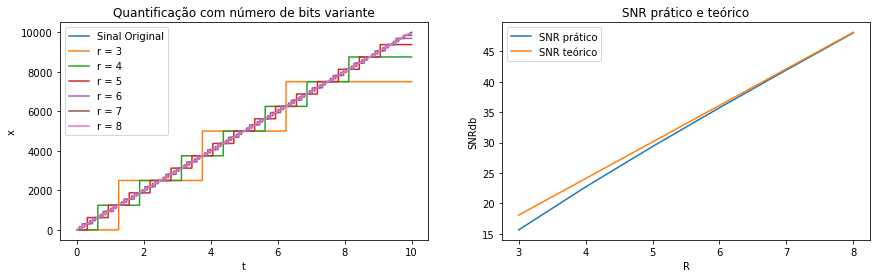

In [12]:
Fs = 48000
#t = np.arange(-0.0001, 0.0011, 1/Fs)
t = np.arange(0, 10, 1/Fs)
x = 1000*t
x[t < 0] = 0
#x[t > 0.001] = 0

# Gráfico das quantificações
plt.figure()
plt.subplots_adjust(right=2)
plt.subplot(1,2,1)
plt.plot(t,x, label="Sinal Original")
plt.title("Quantificação com número de bits variante")
plt.xlabel("t")
plt.ylabel("x")

#Quantificação com vários valores R
R = (3,4,5,6,7,8)
P = np.sum(x**2)/len(x)
Vmax = 10000
SNRs_p = []
SNRs_t = []

for r in R:
    Vq, Iq = Quantific(r,Vmax,'midtread')
    y = Quantificador(x, Vq, Iq)
    plt.plot(t,y, label="r = %s" % r)
    SNRp = Measure_SNRp(x,y)
    SNRt = Measure_SNRt(r,Vmax,P)
    SNRs_p.append(SNRp)
    SNRs_t.append(SNRt)
plt.legend()

# Gráfico dos SNR
plt.subplot(1,2,2)
plt.plot(R,SNRs_p, label="SNR prático")
plt.plot(R,SNRs_t, label="SNR teórico")
plt.title("SNR prático e teórico")
plt.xlabel("R")
plt.ylabel("SNRdb")
plt.legend();

# Verifica-se que tanto no SNR prático como no teórico, o aumento do número de bits resulta no aumento
# da relação sinal-ruído, ou seja, existe menos ruído com maior número de bits.

## Testes com voz
Grave um sinal de voz através do microfone com aproximadamente um segundo de duração. Faça a quantifição do sinal para cada valor de R={3,4,5,6,7,8}. Meça a SNR prática e o valor teórico (para determinar a potência no caso teórico deve usar o mesmo valor que na prática). Construa um gráfico com ambos os valores da SNR teórica e SNR medida em função do número de bits R. Comente os resultados

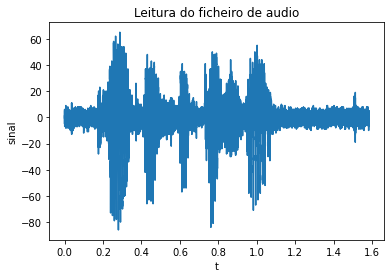

In [13]:
import scipy.io.wavfile as wav
F, sinal = wav.read("teste.wav")
t = np.arange(0, len(sinal)/F, 1/F)
plt.plot(t, sinal);
plt.title("Leitura do ficheiro de audio")
plt.xlabel("t")
plt.ylabel("sinal");

Realize a quantificação do sinal de voz para cada valor de R={3,4,5,6,7,8}. Meça a SNR prática e o valor teórico (para determinar a potência no caso teórico deve usar o mesmo valor que na prática). Construa um gráfico com ambos os valores da SNR teórica e SNR medida em função do número de bits R. Comente os resultados.

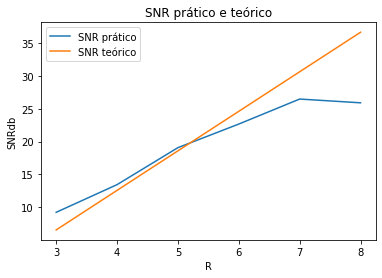

In [14]:
#Quantificação com vários valores R
R = (3,4,5,6,7,8)
P = np.sum(sinal**2)/len(sinal)
Vmax = 90
SNRs_p = []
SNRs_t = []

for r in R:
    Vq, Iq = Quantific(r,Vmax,'midtread')
    y = Quantificador(sinal, Vq, Iq)
    SNRp = Measure_SNRp(sinal,y)
    SNRt = Measure_SNRt(r,Vmax,P)
    SNRs_p.append(SNRp)
    SNRs_t.append(SNRt)
    
# Gráfico dos SNR
plt.plot(R,SNRs_p, label="SNR prático")
plt.plot(R,SNRs_t, label="SNR teórico")
plt.title("SNR prático e teórico")
plt.xlabel("R")
plt.ylabel("SNRdb")
plt.legend();

# Os valores de SNR permanecem quase iguais até com 6 bits de precisão, mas permanece ao mesmo nível com mais bits.
# Isto possivelmente deve-se ao ruído já existente no wav original.

## Imagem
Faça a leitura do ficheiro de imagem. Teste o código a baixo com vários valores de Q. Descreva o que produz o
código.

<class 'PIL.Image.Image'>
(512, 512)


array([[ 41,  41,  39, ...,  40,  72, 115],
       [ 41,  41,  39, ...,  40,  72, 115],
       [ 41,  41,  39, ...,  40,  72, 115],
       ...,
       [241, 241, 237, ..., 166, 172, 162],
       [241, 241, 236, ..., 160, 160, 156],
       [241, 241, 236, ..., 160, 160, 156]], dtype=uint8)

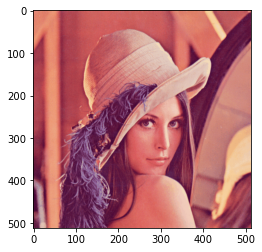

In [15]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
Q = 255
im = Image.open("lenac.tif")#"lena_gray.tif")
#type(im)
imq = im.quantize(Q)
#im.show()
plt.imshow(imq,cmap='gray')
print(type(imq))
imagem = np.asarray(imq)
print(imagem.shape)
imagem[:,:]

resposta

A função 'quantize' realiza a quantificação de cada pixel imagem para o número especificado de sombras de cinzento.

Considere as funções já ciradas e aplique-as à imagem de forma a realizar a quantificação da mesma. Considere diferentes valores de R.

In [16]:
np.max(imagem)

254

In [17]:
import cv2
image = cv2.imread("lenac.tif")
image

ModuleNotFoundError: No module named 'cv2'

In [ ]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray
cv2.imwrite('testGray.tif', gray)

# C. Codificação/ Descodificação

Construa uma função Python que dado um Numpy array (com dimensão  𝑁 ) com valores inteiros, retorne um Numpy array (com dimensão  𝑁.𝑅×1 ) com os mesmos valores convertidos para binário. Esta função ainda deve receber como parâmetros de entrada o número de bits ( 𝑅 ) a usar na conversão de cada inteiro.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def Codific(arr_signal_quantized,R):
    arr_binary = []
    for valor in arr_signal_quantized:
        arr_binary.append([int(a) for a in str(np.binary_repr(valor, width = R))])

    return np.array(arr_binary).flatten()

R = 3
test_in = np.array([0,1,2,3,2,1,2,1,2])
test_out = Codific(test_in, R)
print(test_out)

Construa uma função que dado um Numpy array com valores os bits, faça a conversão para inteiros (considerando R bits).

In [ ]:
def Descodific(arr_binary,R):
     # converter num array 2d para cada grupo de R bits
    binary = np.array(np.split(arr_binary, len(arr_binary)/R))
    
    # produto escalar com o array contendo os pesos de cada bit (3 bits = [4,2,1])
    bitWeight = 2**np.arange(R)[::-1]
    arr_signal = binary.dot(bitWeight)
    return arr_signal

print(Descodific(test_out, R))

Com base nas funções já implementadas, faça a codificação e descodificação PCM uniforme do sinal de áudio previamente gravado. Verifique qual a SNR obtida e ouça o sinal descodificado. Use para o efeito R=3, 5 e 8.

In [ ]:
#Resposta:

## Canal - O canal é modelado pelo modelo Binary Symmetric Channel [BSC](https://en.wikipedia.org/wiki/Binary_symmetric_channel)

Com as duas funções realizadas e admitindo que os restantes blocos do emissor, canal e receptor possam ser simulados pela expressão  𝑦=1∗𝑛𝑝.𝑙𝑜𝑔𝑖𝑐𝑎𝑙_𝑥𝑜𝑟(𝑥,𝑛𝑝.𝑟𝑎𝑛𝑑𝑜𝑚.𝑏𝑖𝑛𝑜𝑚𝑖𝑎𝑙(1,𝐵𝐸𝑅𝑡,𝑙𝑒𝑛(𝑥))) , onde  𝐵𝐸𝑅𝑡  contém o valor pretendido para o bit error rate.

Meça o BER antes e após a correcção de erros, para diferentes valores de  𝐵𝐸𝑅𝑡 .

In [ ]:
#x - array de bits a entrar no canal
#y - array de bits a sair do canal


Considere o sinal de áudio previamente gravado. Meça SNR na recepção e o BER, para diferentes valores de 𝐵𝐸𝑅𝑡 . (considera-se que o ruído é a diferença entre o sinal à entrada do transmissor e o sinal à saída do receptor); Comente os resultados obtidos.

# D.  Deteção e Correção de erros 

Deteção e Correção de erros
Construa uma função que implemente o Hamming(7,4). Utilize a seguinte matriz geradora:

In [ ]:
import numpy as np
G=np.array([[1,0,0,0,1,1,0],[0,1,0,0,1,0,1],[0,0,1,0,0,1,1],[0,0,0,1,1,1,1]])
print(G)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def Hamming_8_4(arr_bits):
    # arr_bits   -> Será a trama a enviar,   com k=4 bits cada mensagem
    # arr_binary -> Será a trama codificada, com n=8 bits cada palavra

    # Começamos por separar o enviado em mensagems de 4 bits cada, colocando um padding caso necessário.
    if ((len(arr_bits) % 4) != 0): # O padding é necessário se não for possível separar a trama em grupos de 4 bits.
        # Inserimos zeros no começo de forma a prefazer os 4 bits da mensagem.
        # Usamos a função insert enviando:
        #   o array onde queremos inserir           - arr_bits
        #   o índice do array onde queremos inserir - no início da trama, índice 0
        #   aquilo que queremos inserir             - um array com (4 - (nº de valores que sobram ao dividir em grupos))
        arr_bits = np.insert(arr_bits, 0, np.zeros(4 - (len(arr_bits) % 4)))

    arr_bits_split   = np.array_split(arr_bits, len(arr_bits)/4) # Fazemos um split do array em mensagens de 4 bits.
    #print('Mensagens a enviar: ' + str(arr_bits_split))

    # A função np.dot permite efetuar a multiplicação entre matrizes.
    # Usamos %2 de forma a transformar os resultados em valores binários.
    arr_binary = np.array( np.dot(arr_bits_split, G)%2 ).tolist()
    return np.concatenate(arr_binary)

Construa uma função que dado um Numpy array M bits, para cada 8 bits detecte e corriga possíveis erros, sendo o resultado 4 bits de mensagem.

In [ ]:
def Detetor(arr_binary):
    # arr_binary -> Será a trama recebida,  com n=8 bits cada palavra
    # arr_bits   -> Será a trama corrigida, com k=4 bits cada mensagem

    # Começamos por separar o enviado em palavras de 8 bits cada, colocando um padding caso necessário.
    if ((len(arr_binary) % 8) != 0): # O padding é necessário se não for possível separar a trama em grupos de 8 bits.
        # Inserimos zeros antes dos bits extra de forma a prefazer os 8 bits de código.
        # Usamos a função insert enviando:
        #   o array onde queremos inserir           - arr_binary
        #   o índice do array onde queremos inserir - no início da trama, índice 0
        #   aquilo que queremos inserir             - um array com (8 - (nº de valores que sobram ao dividir em grupos))
        arr_binary = np.insert(arr_binary, 0, np.zeros(8 - (len(arr_binary) % 8)))

    arr_binary_split = np.array_split(arr_binary, len(arr_binary)/8) # Fazemos um split do array em palavras de 8 bits.
    #print('Trama recebida: ' + str(arr_binary_split))

    # Agora, para cada palavra, vamos calular o síndroma.
    # O síndroma terá n-k bits - 4 no caso estudado. Multiplicamos matricialmente cada 8 bits da palavra
    # de código por HT.
    sindroma = np.array( np.dot(arr_binary_split, HT) % 2 ).tolist()

    arr_bits = []
    # Tendo agora os síndromas, vamos comparar às linhas de HT, descobrindo o bit em erro, caso este exista.
    for i in range (len(arr_binary_split)):
        palavra = arr_binary_split[i]
        for lin_index in range (8):
            if (np.array_equal(sindroma[i], HT[lin_index])):
                # Se o síndroma não for 0, será igual a uma das linhas de HT, troca-se assim o bit em erro, somando
                # ao erro (bit em erro + 1 em binário).
                palavra[lin_index] = np.bitwise_xor(palavra[lin_index], 1)

        arr_bits.append(palavra[:4]) # Guardamos os primeiros 4 bits - os bits da mensagem.
    return np.concatenate(arr_bits)

Faça um conjunto de testes para verificar o correto funcionamento das funções.

In [ ]:
# Vamos realizar 3 testes à primeira função:

## TESTE 1 - Função Hamming_8_4()
# -> codificação pelo código H(8,4), enviando um array com uma única mensagem.
print('Teste 1')
print('Palavra de código resultante do teste 1: ' + str(Hamming_8_4([1,0,1,0])))
#    Espera-se que os primeiros 4 bits sejam iguais aos bits da mensagem (1010), seguidos de outros 4 bits.

#    Confirma-se este caso.

Considere o sinal de áudio previamente gravado. Meça SNR na recepção e o BER após a correcção de erros, para diferentes valores de 𝐵𝐸𝑅𝑡 . (considera-se que o ruído é a diferença entre o sinal à entrada do transmissor e o sinal à saída do receptor); Comente os resultados obtidos.